<a href="https://colab.research.google.com/github/dayaniravi123/Fruit-Detection/blob/main/Boston_Housing_Price_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf

In [2]:
dataset = tf.keras.datasets.boston_housing

In [10]:
(X_train, y_train), (X_test, y_test) = dataset.load_data()

In [22]:
X_train.shape

(404, 13)

In [23]:
X_train[:,1].shape

(404,)

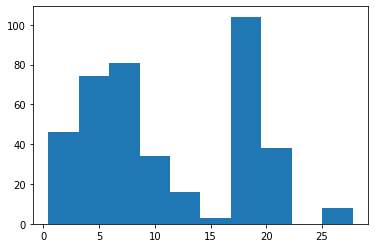

In [30]:
import matplotlib.pyplot as plt

plt.hist(X_train[:,2])
plt.show()

In [40]:
## Z-score normalization

temp = X_train[:,2]

mean = tf.reduce_mean(temp)

std = tf.math.reduce_std(temp)

temp = (temp - mean)/std


## min - max transformation

temp = X_train[:, 2]
min = tf.math.reduce_min(temp)
max = tf.math.reduce_max(temp)

temp = (temp - min)/(max - min)



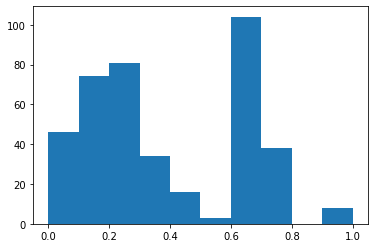

In [41]:
plt.hist(temp)
plt.show()

In [42]:
## implement model on given dataset

from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)



LinearRegression()

In [44]:
y_pred = model.predict(X_test)

y_pred

array([ 9.69267239, 21.05859431, 20.94145461, 34.25223414, 25.95902598,
       20.56741038, 28.15310405, 25.07113862, 20.30519458, 22.82489511,
       20.29027213, 18.07938917, 16.46141024, 35.31166595, 19.41369959,
       19.34727116, 24.58140904, 21.01346252, 19.99079236, 23.79286427,
       12.20780045, 17.14218992, 22.51468752, 12.92570511, 21.18070615,
       23.94073547, 33.46176314, 24.2631555 , 13.35213096, 20.71939252,
       23.45082103, 19.1486881 , 36.09743765, 23.47113531, 19.03141995,
        5.92425733, 14.02090469, 22.96425377, 16.01731242, 27.09134249,
       22.06997029, 28.61755389, 17.75679772, 34.75579014, 31.29455712,
       24.73234165, 31.12655323, 18.09268992, 22.62638989, 24.21208909,
       30.5854317 , 18.71860574, 10.50163617, 13.73779292, 34.4022841 ,
       27.53140317, 18.08151522, 40.05101982, 37.63271513, 24.64021422,
       25.73823434, 20.64369987, 20.33514699, 21.38393124, 24.63485497,
       23.53071805, 17.42141466, 26.76911736,  3.83782148, 11.97

In [53]:
## calculating MSE error

test_MSE = tf.reduce_mean(abs(y_pred - y_test))

test_MSE

<tf.Tensor: shape=(), dtype=float64, numpy=3.4641858124067193>

In [52]:
## training error

y_pred_train = model.predict(X_train)
y_pred_train

train_MSE = tf.reduce_mean(abs(y_pred_train - y_train))
train_MSE

<tf.Tensor: shape=(), dtype=float64, numpy=3.3517390725615477>

In [56]:
## with normalization on all the dataset

from sklearn import preprocessing

X_train = preprocessing.normalize(X_train, norm = "l2")

model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [57]:
X_test = preprocessing.normalize(X_test, norm = 'l2')

y_pred = model.predict(X_test)

test_MSE = tf.reduce_mean((y_pred - y_test))

test_MSE

<tf.Tensor: shape=(), dtype=float64, numpy=18.16551049349642>

In [59]:

test_MSE = tf.reduce_mean(abs(y_pred - y_test))

test_MSE

<tf.Tensor: shape=(), dtype=float64, numpy=3.1678706010618187>

In [88]:
## implement linear regreesion model using tensorflow

from tensorflow.keras import layers

model = tf.keras.Sequential(
    layers.Dense(units = 1)#,
    #layers.Dense(64, activation= 'relu'),
    #layers.Dense(64, activation= 'relu'),
    #layers.Dense(1)
)

model.compile(optimizer=tf.optimizers.Adam(learning_rate=0.5), loss='mean_absolute_error')

In [89]:
## train model

history = model.fit(
    X_train,
    y_train,
    epochs = 50,
    batch_size = 10,
    validation_split = 0.2
)

Epoch 1/50
33/33 [==============================] - 1s 5ms/step - loss: 9.6737 - val_loss: 6.2474
Epoch 2/50
33/33 [==============================] - 0s 2ms/step - loss: 5.8729 - val_loss: 5.6907
Epoch 3/50
33/33 [==============================] - 0s 2ms/step - loss: 5.1558 - val_loss: 5.3683
Epoch 4/50
33/33 [==============================] - 0s 2ms/step - loss: 5.0416 - val_loss: 5.6180
Epoch 5/50
33/33 [==============================] - 0s 3ms/step - loss: 4.9309 - val_loss: 5.5010
Epoch 6/50
33/33 [==============================] - 0s 3ms/step - loss: 4.8425 - val_loss: 5.2120
Epoch 7/50
33/33 [==============================] - 0s 2ms/step - loss: 4.7682 - val_loss: 5.2023
Epoch 8/50
33/33 [==============================] - 0s 2ms/step - loss: 4.7299 - val_loss: 5.1984
Epoch 9/50
33/33 [==============================] - 0s 2ms/step - loss: 4.7775 - val_loss: 5.2299
Epoch 10/50
33/33 [==============================] - 0s 3ms/step - loss: 4.6867 - val_loss: 5.1341
Epoch 11/50
33/33 [

In [74]:
history.history

{'loss': [4.461400985717773,
  4.495414733886719,
  4.381473064422607,
  4.417571067810059,
  4.39009428024292,
  4.33073091506958,
  4.335663318634033,
  4.302309989929199,
  4.291409969329834,
  4.3212151527404785,
  4.337247371673584,
  4.305604934692383,
  4.3260111808776855,
  4.272209644317627,
  4.283989906311035,
  4.2141289710998535,
  4.278946876525879,
  4.222083568572998,
  4.249330043792725,
  4.2455854415893555,
  4.2281389236450195,
  4.225119113922119,
  4.169029712677002,
  4.209986686706543,
  4.153877258300781,
  4.156938076019287,
  4.157281875610352,
  4.14055871963501,
  4.207640647888184,
  4.113517761230469,
  4.149768352508545,
  4.122306823730469,
  4.0770368576049805,
  4.13120698928833,
  4.069446563720703,
  4.262613296508789,
  4.310723781585693,
  4.0884881019592285,
  4.073154449462891,
  4.085608005523682,
  4.208122253417969,
  4.0942840576171875,
  4.045319080352783,
  4.0657172203063965,
  4.035459518432617,
  4.044917106628418,
  4.014254093170166,


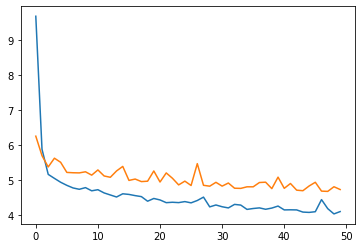

In [90]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])